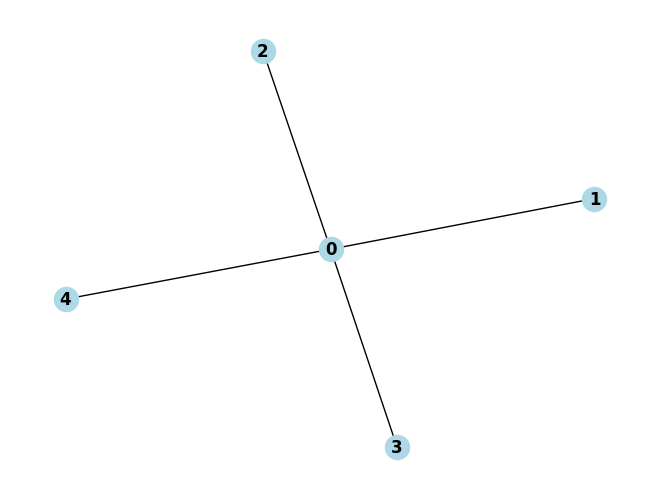

In [7]:
import numpy as np
import rustworkx as rx
import networkx as nx

num_nodes = 5
w = np.array(
    [[0.0, 1.0, 1.0, 1.0, 1.0], [1.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0]]
)

G = rx.PyGraph.from_adjacency_matrix(w)
#rx.visualization.mpl_draw(G) # rx refuses to collaborate in this notebook for some reason
nx_graph = nx.Graph()
nx_graph.add_edges_from(G.edge_list())

# Plot the graph with matplotlib
nx.draw(nx_graph, with_labels=True, node_color="lightblue", font_weight="bold")

In [8]:
def objective_value(x, w):
    """Compute the value of a cut.
    Args:
        x: Binary string as numpy array.
        w: Adjacency matrix.
    Returns:
        Value of the cut.
    """
    X = np.outer(x, (1 - x))
    w_01 = np.where(w != 0, 1, 0)
    return np.sum(w_01 * X)


def bitfield(n, L):
    result = np.binary_repr(n, L)
    return [int(digit) for digit in result]  # [2:] to chop off the "0b" part


# use the brute-force way to generate the oracle
L = num_nodes
max = 2**L
sol = np.inf
for i in range(max):
    cur = bitfield(i, L)

    how_many_nonzero = np.count_nonzero(cur)
    if how_many_nonzero * 2 != L:  # not balanced
        continue

    cur_v = objective_value(np.array(cur), w)
    if cur_v < sol:
        sol = cur_v

print(f"Objective value computed by the brute-force method is {sol}")

Objective value computed by the brute-force method is inf
